INFO:root:['Cycle Agree - 101', 10] : The transformation function did not reduce the error, removing rotation and retying (old_error=547.256124178, new_error=599.938472348).
C:\Program Files\Anaconda3\envs\iposition\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Original Misplacement: 278.668470039
Original Swap: 0.2
Original Edge Resizing: 169.654385047
Original Edge Distortion: 0.5
Axis Swap Pairs: [[0, 3], [3, 4]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 447.527409909
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 138.788822535
Raw Deanonymized Misplacement: 109.451224836
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 1.10690961699
Translation Magnitude: 16.1228213086
Translation: [-15.428210492688692, -4.6814194366052249]
Geometric Distance Threshold: 138.788822535
Number of Components: 3
Accurate Placements: 2
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Misassignment: 3
Accurate Misassignment: 2
Inaccurate Misassignment: 1
Swap Distance Threshold: 147.379292512
True Swap Data Distance: nan
T

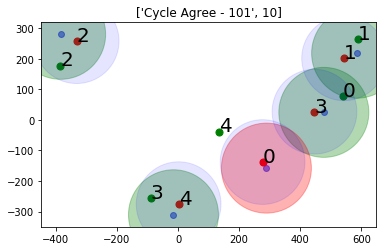

Original Misplacement: 265.708768598
Original Swap: 0.2
Original Edge Resizing: 158.398818982
Original Edge Distortion: 0.6
Axis Swap Pairs: [[0, 4], [2, 4]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 469.207839807
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 109.716622856
Raw Deanonymized Misplacement: 76.6569976697
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.809787403892
Scaling: 1.08005785096
Translation Magnitude: 49.0915149533
Translation: [-36.430181025756113, 32.906211432454171]
Geometric Distance Threshold: 109.716622856
Number of Components: 3
Accurate Placements: 2
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Misassignment: 3
Accurate Misassignment: 2
Inaccurate Misassignment: 1
Swap Distance Threshold: 90.4994960509
True Swap Data Dista

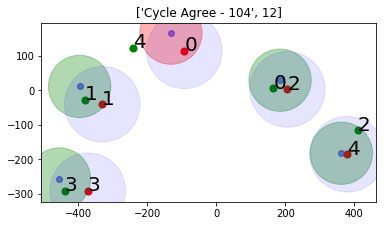

INFO:root:['Cycle Agree - 105', 2] : The transformation function did not reduce the error, removing rotation and retying (old_error=537.560093435, new_error=539.527565868).


Original Misplacement: 307.176282438
Original Swap: 0.2
Original Edge Resizing: 161.884543562
Original Edge Distortion: 0.7
Axis Swap Pairs: [[0, 4], [3, 4]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 479.686418163
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 131.122752359
Raw Deanonymized Misplacement: 107.512018687
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 1.11628690648
Translation Magnitude: 70.4317048817
Translation: [-15.493739944024544, 68.706397628479891]
Geometric Distance Threshold: 131.122752359
Number of Components: 3
Accurate Placements: 2
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Misassignment: 3
Accurate Misassignment: 1
Inaccurate Misassignment: 2
Swap Distance Threshold: 105.022804917
True Swap Data Distance: nan
Tr

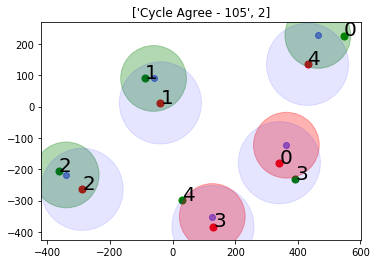

INFO:root:['Cycle Agree - 112', 6] : The transformation function did not reduce the error, removing rotation and retying (old_error=886.375876457, new_error=943.968272184).


Original Misplacement: 258.194873269
Original Swap: 0.2
Original Edge Resizing: 153.137740869
Original Edge Distortion: 0.7
Axis Swap Pairs: [[1, 3], [2, 3]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 491.255616602
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 266.844868832
Raw Deanonymized Misplacement: 177.275175291
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 0.853408596527
Translation Magnitude: 146.034385802
Translation: [-102.34843294384696, 104.16736586124367]
Geometric Distance Threshold: 266.844868832
Number of Components: 3
Accurate Placements: 2
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Misassignment: 3
Accurate Misassignment: 2
Inaccurate Misassignment: 1
Swap Distance Threshold: 160.734544816
True Swap Data Distance: nan
T

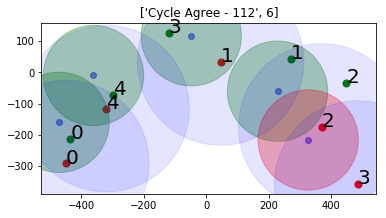

INFO:root:['Debatable - 104', 2] : The transformation function did not reduce the error, removing rotation and retying (old_error=793.264978588, new_error=826.253450538).


Original Misplacement: 323.193831967
Original Swap: 0.1
Original Edge Resizing: 146.090858723
Original Edge Distortion: 0.7
Axis Swap Pairs: [[0, 1]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 596.522907944
Deanonymized Accurate Placements: 3
Deanonymized Inaccurate Placements: 2
Deanonymized Accuracy Threshold: 256.617030762
Raw Deanonymized Misplacement: 158.652995718
Transformation Auto-Exclusion: True
Number of Points Excluded From Geometric Transform: 2
Rotation Theta: nan
Scaling: nan
Translation Magnitude: nan
Translation: [nan, nan]
Geometric Distance Threshold: 256.617030762
Number of Components: 3
Accurate Placements: 2
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Misassignment: 3
Accurate Misassignment: 1
Inaccurate Misassignment: 2
Swap Distance Threshold: 256.617030762
True Swap Data Distance: nan
True Swap Actual Distance: nan
Partial Swap Data Distance: nan

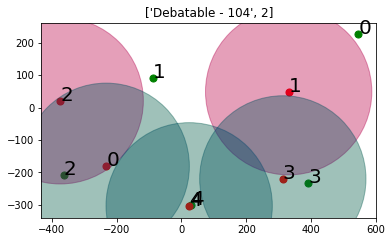

Original Misplacement: 210.604582994
Original Swap: 0.0
Original Edge Resizing: 130.868700578
Original Edge Distortion: 0.3
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 268.919834385
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 208.176916735
Raw Deanonymized Misplacement: 149.366871713
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.819467233785
Scaling: 1.2625896005
Translation Magnitude: 131.733258766
Translation: [-3.546564588140086, 131.68550924399963]
Geometric Distance Threshold: 208.176916735
Number of Components: 4
Accurate Placements: 3
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassignment: 1
Inaccurate Misassignment: 1
Swap Distance Threshold: 129.16507239
True Swap Data Distance: nan
True Swa

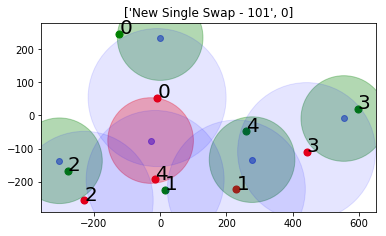

Original Misplacement: 131.922805484
Original Swap: 0.0
Original Edge Resizing: 70.9961866629
Original Edge Distortion: 0.3
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 204.955747787
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 219.675051813
Raw Deanonymized Misplacement: 119.957108547
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.801737473859
Scaling: 0.987995826748
Translation Magnitude: 62.3175016062
Translation: [-55.84484267905043, -27.655461532730715]
Geometric Distance Threshold: 219.675051813
Number of Components: 4
Accurate Placements: 3
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassignment: 1
Inaccurate Misassignment: 1
Swap Distance Threshold: 238.228067783
True Swap Data Distance: nan
True

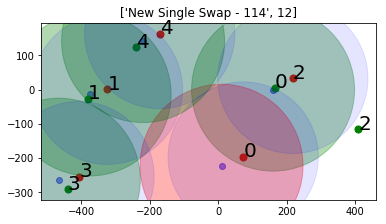

INFO:root:['New Single Swap - 118', 10] : The transformation function did not reduce the error, removing rotation and retying (old_error=505.539527104, new_error=520.067137197).


Original Misplacement: 191.51938773
Original Swap: 0.0
Original Edge Resizing: 149.553700367
Original Edge Distortion: 0.2
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 302.875418149
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 129.610800145
Raw Deanonymized Misplacement: 101.107905421
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 1.09195451238
Translation Magnitude: 62.8978847687
Translation: [36.617864820673105, -51.139768129628663]
Geometric Distance Threshold: 129.610800145
Number of Components: 4
Accurate Placements: 3
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassignment: 1
Inaccurate Misassignment: 1
Swap Distance Threshold: 103.909211598
True Swap Data Distance: nan
True Swap Actual 

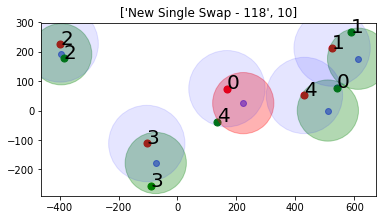

Original Misplacement: 153.388496034
Original Swap: 0.0
Original Edge Resizing: 63.0698297612
Original Edge Distortion: 0.2
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 210.522205459
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 269.47916741
Raw Deanonymized Misplacement: 149.571003011
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.835686554502
Scaling: 0.980997591399
Translation Magnitude: 57.1792898862
Translation: [33.450571734751719, 46.373812033363706]
Geometric Distance Threshold: 269.47916741
Number of Components: 4
Accurate Placements: 3
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassignment: 1
Inaccurate Misassignment: 1
Swap Distance Threshold: 227.535587393
True Swap Data Distance: nan
True Sw

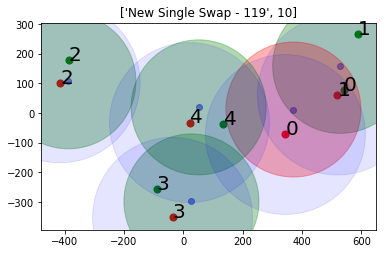

INFO:root:['New Single Swap - 120', 14] : The transformation function did not reduce the error, removing rotation and retying (old_error=423.421860433, new_error=470.371142782).


Original Misplacement: 187.019455934
Original Swap: 0.0
Original Edge Resizing: 77.1123999378
Original Edge Distortion: 0.2
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 301.436201797
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 155.429008192
Raw Deanonymized Misplacement: 84.6843720867
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 1.0297275352
Translation Magnitude: 16.3452521515
Translation: [-5.8292566935185874, 15.2704628056443]
Geometric Distance Threshold: 155.429008192
Number of Components: 4
Accurate Placements: 2
Inaccurate Placements: 1
True Swaps: 1
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassignment: 2
Inaccurate Misassignment: 0
Swap Distance Threshold: 154.192643496
True Swap Data Distance: 301.131489382
True Swap

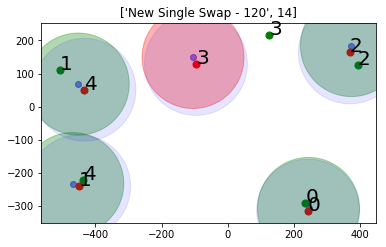

INFO:root:['Old False Positive - 101', 11] : The transformation function did not reduce the error, removing rotation and retying (old_error=472.625206286, new_error=494.451050438).


Original Misplacement: 381.974594166
Original Swap: 0.4
Original Edge Resizing: 96.0354770998
Original Edge Distortion: 1.1
Axis Swap Pairs: [[1, 2], [1, 4], [2, 3], [2, 4]]
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 720.746076034
Deanonymized Accurate Placements: 3
Deanonymized Inaccurate Placements: 2
Deanonymized Accuracy Threshold: 122.021215812
Raw Deanonymized Misplacement: 94.5250412572
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 2
Rotation Theta: nan
Scaling: 0.980125818997
Translation Magnitude: 57.8402273592
Translation: [57.078169560989579, -9.3581227036304639]
Geometric Distance Threshold: 122.021215812
Number of Components: 4
Accurate Placements: 3
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassignment: 0
Inaccurate Misassignment: 2
Swap Distance Threshold: 94.9595210316
True Swap Data

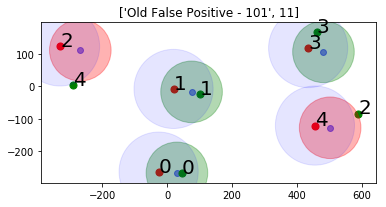

Original Misplacement: 412.256489376
Original Swap: 0.2
Original Edge Resizing: 135.620218882
Original Edge Distortion: 0.7
Axis Swap Pairs: [[0, 2], [2, 4]]
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 708.112872864
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 300.527946948
Raw Deanonymized Misplacement: 177.218082134
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.839986739799
Scaling: 1.05090131684
Translation Magnitude: 100.909077231
Translation: [100.29881196355998, 11.081073341743263]
Geometric Distance Threshold: 300.527946948
Number of Components: 4
Accurate Placements: 3
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassignment: 1
Inaccurate Misassignment: 1
Swap Distance Threshold: 275.055813089
True Swap Data Distan

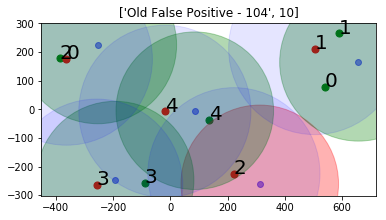

Original Misplacement: 304.163755216
Original Swap: 0.3
Original Edge Resizing: 132.560785313
Original Edge Distortion: 0.9
Axis Swap Pairs: [[0, 3], [0, 4], [3, 4]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 573.775145741
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 180.454219184
Raw Deanonymized Misplacement: 111.470839105
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.826786603092
Scaling: 1.13864000343
Translation Magnitude: 66.3604730612
Translation: [60.863743183560871, 26.444605321213373]
Geometric Distance Threshold: 180.454219184
Number of Components: 4
Accurate Placements: 3
Inaccurate Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassignment: 1
Inaccurate Misassignment: 1
Swap Distance Threshold: 131.084542081
True Swap Dat

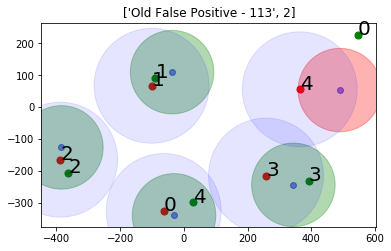

INFO:root:['Old False Positive - 120', 12] : The transformation function did not reduce the error, removing rotation and retying (old_error=325.463531157, new_error=450.390665092).


Original Misplacement: 303.120934861
Original Swap: 0.3
Original Edge Resizing: 146.298771575
Original Edge Distortion: 0.7
Axis Swap Pairs: [[0, 2], [0, 4], [2, 4]]
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 553.746463416
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 85.4604844607
Raw Deanonymized Misplacement: 65.0927062313
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 1.06413601192
Translation Magnitude: 15.0065240938
Translation: [-9.6117492309764145, -11.52432393242951]
Geometric Distance Threshold: 85.4604844607
Number of Components: 4
Accurate Placements: 2
Inaccurate Placements: 1
True Swaps: 1
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassignment: 2
Inaccurate Misassignment: 0
Swap Distance Threshold: 80.8516273961
True Swap Data Distance

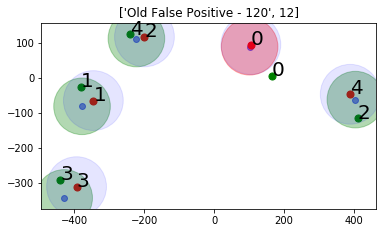

In [1]:
import cogrecon
from cogrecon.core.full_pipeline import full_pipeline
from cogrecon.core.data_structures import ParticipantData, AnalysisConfiguration

actual_coordinates_filepath = r"Z:\Kevin\iPosition\Hillary\MRE\actual_coordinates.txt"
filepath_template = r"Z:\Kevin\iPosition\Hillary\MRE\{0}\{0}position_data_coordinates.txt"
participant_ids = ['101', '104', '105', '112', '104', '101', '114', '118', '119', '120', '101', '104', '113', '120']
labels = ['Cycle Agree - 101', 'Cycle Agree - 104', 'Cycle Agree - 105', 'Cycle Agree - 112',
          'Debatable - 104',
          'New Single Swap - 101', 'New Single Swap - 114',
          'New Single Swap - 118', 'New Single Swap - 119', 'New Single Swap - 120',
          'Old False Positive - 101', 'Old False Positive - 104',
          'Old False Positive - 113', 'Old False Positive - 120']
trial_nums = [10, 12, 2, 6, 2, 0, 12, 10, 10, 14, 11, 10, 2, 12]

for pid, label, trial_n in zip(participant_ids, labels, trial_nums):
    data = ParticipantData.load_from_file(actual_coordinates_filepath, filepath_template.format(pid), (15, 5, 2))
    data.trials = [data.trials[trial_n]]
    config = AnalysisConfiguration(debug_labels=[label, trial_n])
    full_pipeline(data, config, visualize=True)